### LOADING LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# for ML Modelling

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import tree

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### LOADING DATA

In [2]:
# Loading the train and test CSV into Data frame
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### DEALING WITH MISSING DATA

In [3]:
train_df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
test_df['Fare'].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [5]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.500,0,0,3701,nan,NaN,S


In [6]:
test_df.Fare[test_df['Fare'].isnull()] = test_df[test_df.Pclass==3].Fare.mean()

C:\Users\errit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
test_df.iloc[152]

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                        60.500
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       12.460
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [8]:
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.000,0,0,7538,9.225,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.000,0,0,330972,7.629,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.000,1,1,248738,29.000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000,0,0,2657,7.229,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.000,2,0,A/4 48871,24.150,NaN,S


In [9]:
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [11]:
train_df.shape

(891, 12)

In [12]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [13]:
test_df.shape

(418, 12)

In [14]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train_df[train_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,nan,0,0,244373,13.000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,nan,0,0,2649,7.225,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,nan,0,0,2631,7.225,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,nan,0,0,330959,7.879,NaN,Q


In [16]:
train_df[train_df['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S


In [17]:
train_df[train_df['Embarked'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [18]:
print(train_df['Embarked'].isnull().value_counts())
print(train_df['Cabin'].isnull().value_counts())
print(train_df['Age'].isnull().value_counts())

False    889
True       2
Name: Embarked, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    714
True     177
Name: Age, dtype: int64


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [21]:
train_df.drop(train_df[['PassengerId','Name','Ticket']],axis=1,inplace = True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1,0,7.250,NaN,S
1,1,1,female,38.000,1,0,71.283,C85,C
2,1,3,female,26.000,0,0,7.925,NaN,S
3,1,1,female,35.000,1,0,53.100,C123,S
4,0,3,male,35.000,0,0,8.050,NaN,S
5,0,3,male,nan,0,0,8.458,NaN,Q
6,0,1,male,54.000,0,0,51.862,E46,S
7,0,3,male,2.000,3,1,21.075,NaN,S
8,1,3,female,27.000,0,2,11.133,NaN,S
9,1,2,female,14.000,1,0,30.071,NaN,C


In [22]:
test_df.drop(test_df[['PassengerId','Name','Ticket']],axis=1,inplace = True)
test_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.500,0,0,7.829,NaN,Q
1,1,3,female,47.000,1,0,7.000,NaN,S
2,0,2,male,62.000,0,0,9.688,NaN,Q
3,0,3,male,27.000,0,0,8.662,NaN,S
4,1,3,female,22.000,1,1,12.287,NaN,S
5,0,3,male,14.000,0,0,9.225,NaN,S
6,1,3,female,30.000,0,0,7.629,NaN,Q
7,0,2,male,26.000,1,1,29.000,NaN,S
8,1,3,female,18.000,0,0,7.229,NaN,C
9,0,3,male,21.000,2,0,24.150,NaN,S


In [23]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train_df.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [25]:
train_df['Pclass']=train_df['Pclass'].astype(object)

In [26]:
test_df['Pclass']=test_df['Pclass'].astype(object)

In [27]:
train_df['HasCabin'] = np.where(train_df[['Cabin']].isnull()==True,0,1)

In [28]:
test_df['HasCabin'] = np.where(test_df[['Cabin']].isnull()==True,0,1)

In [29]:
train_df['Pclass'].replace(3,'U',inplace=True)
train_df['Pclass'].replace(1,'L',inplace=True)
train_df['Pclass'].replace(2,'M',inplace=True)

In [30]:
test_df['Pclass'].replace(3,'U',inplace=True)
test_df['Pclass'].replace(1,'L',inplace=True)
test_df['Pclass'].replace(2,'M',inplace=True)

In [31]:
train_df['HasSibSp'] = np.where(train_df[['SibSp']]==0,0,1)
train_df['HasParch'] = np.where(train_df[['Parch']]==0,0,1)

In [32]:
test_df['HasSibSp'] = np.where(test_df[['SibSp']]==0,0,1)
test_df['HasParch'] = np.where(test_df[['Parch']]==0,0,1)

In [33]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone']=np.where(train_df['FamilySize'] == 1, 1,0)

In [34]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone']=np.where(test_df['FamilySize'] == 1, 1,0)

In [35]:
train_df.loc[61,'Embarked']='S'
train_df.loc[829,'Embarked']='S'

In [36]:
train_df.drop(train_df[['Cabin']],axis=1,inplace=True)

In [37]:
test_df.drop(test_df[['Cabin']],axis=1,inplace=True)

In [38]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [39]:
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [40]:
# Age Imputations

age_avg = train_df['Age'].mean()
age_std = train_df['Age'].std()
age_null_count = train_df['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train_df['Age'][np.isnan(train_df['Age'])] = age_null_random_list
train_df['Age'] = train_df['Age'].astype(int)


C:\Users\errit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [41]:
# Age Imputations

age_avg = test_df['Age'].mean()
age_std = test_df['Age'].std()
age_null_count = test_df['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test_df['Age'][np.isnan(test_df['Age'])] = age_null_random_list
test_df['Age'] = test_df['Age'].astype(int)

C:\Users\errit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
train_df.isnull().any()

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
HasCabin      False
HasSibSp      False
HasParch      False
FamilySize    False
IsAlone       False
dtype: bool

In [43]:
test_df.isnull().any()

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
HasCabin      False
HasSibSp      False
HasParch      False
FamilySize    False
IsAlone       False
dtype: bool

### FEATURE ENGINEERING

Text(0.5,0,'Age in Years')

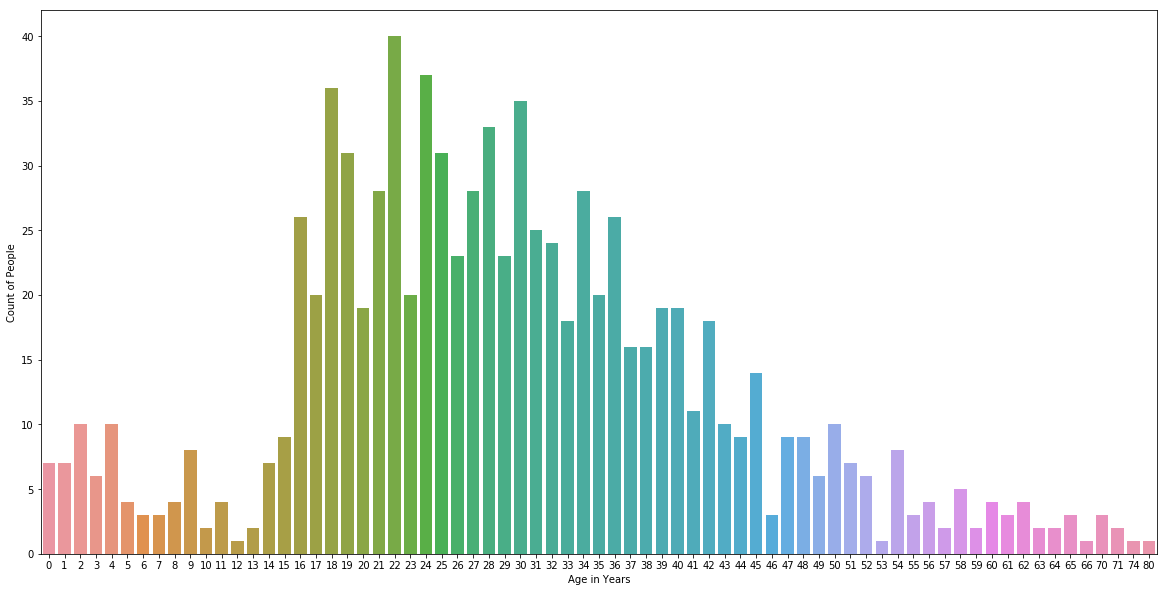

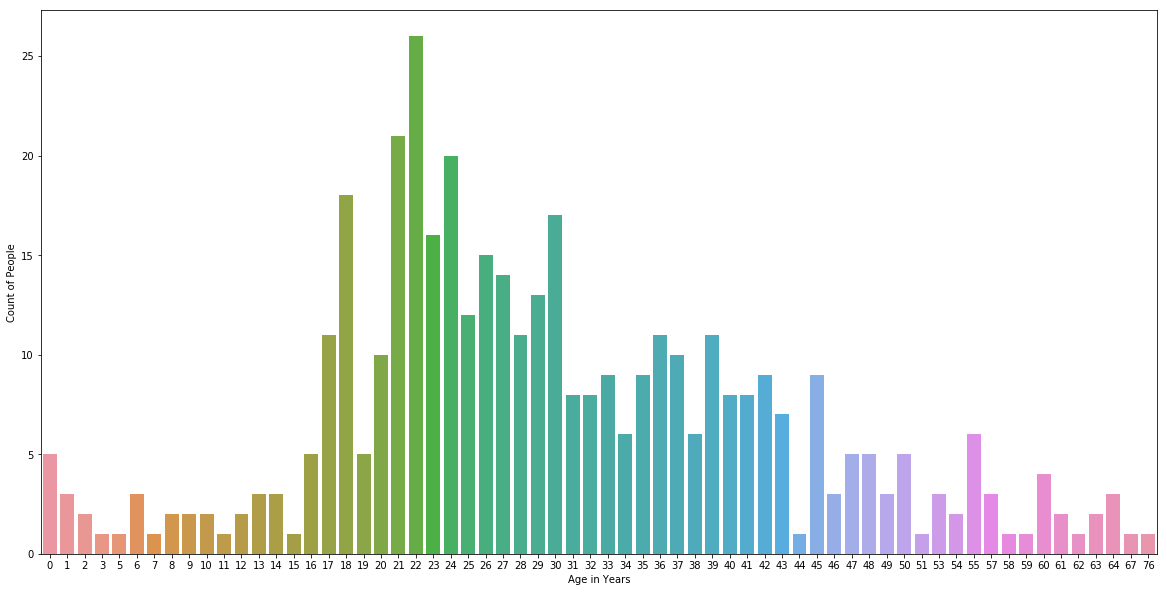

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=train_df)
plt.ylabel("Count of People")
plt.xlabel("Age in Years")


plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=test_df)
plt.ylabel("Count of People")
plt.xlabel("Age in Years")


Text(0.5,0,'Age in Years')

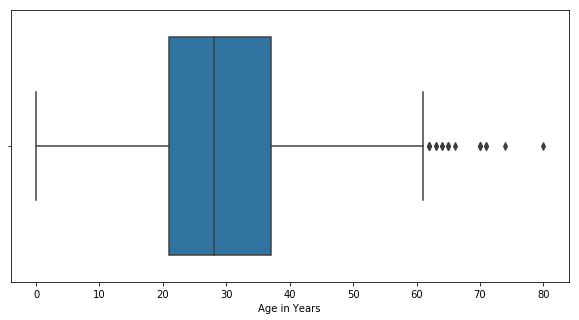

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Age", data=train_df)
plt.xlabel("Age in Years")

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,HasSibSp,HasParch,FamilySize,IsAlone
0,0,U,1,22,1,0,7.250,S,0,1,0,2,0
1,1,L,0,38,1,0,71.283,C,1,1,0,2,0
2,1,U,0,26,0,0,7.925,S,0,0,0,1,1
3,1,L,0,35,1,0,53.100,S,1,1,0,2,0
4,0,U,1,35,0,0,8.050,S,0,0,0,1,1


In [47]:
train_df_dum=pd.get_dummies(train_df)
test_df_dum=pd.get_dummies(test_df)


In [48]:
train_df_dum.head()

,Survived,Sex,Age,SibSp,Parch,Fare,HasCabin,HasSibSp,HasParch,FamilySize,IsAlone,Pclass_L,Pclass_M,Pclass_U,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22,1,0,7.250,0,1,0,2,0,0,0,1,0,0,1
1,1,0,38,1,0,71.283,1,1,0,2,0,1,0,0,1,0,0
2,1,0,26,0,0,7.925,0,0,0,1,1,0,0,1,0,0,1
3,1,0,35,1,0,53.100,1,1,0,2,0,1,0,0,0,0,1
4,0,1,35,0,0,8.050,0,0,0,1,1,0,0,1,0,0,1


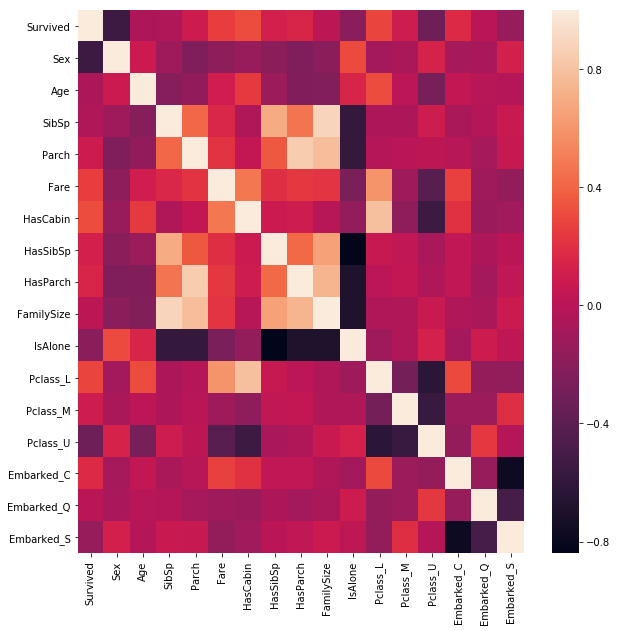

In [49]:
corr = train_df_dum.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)


In [50]:
corr_df = pd.DataFrame(corr)

C:\Users\errit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


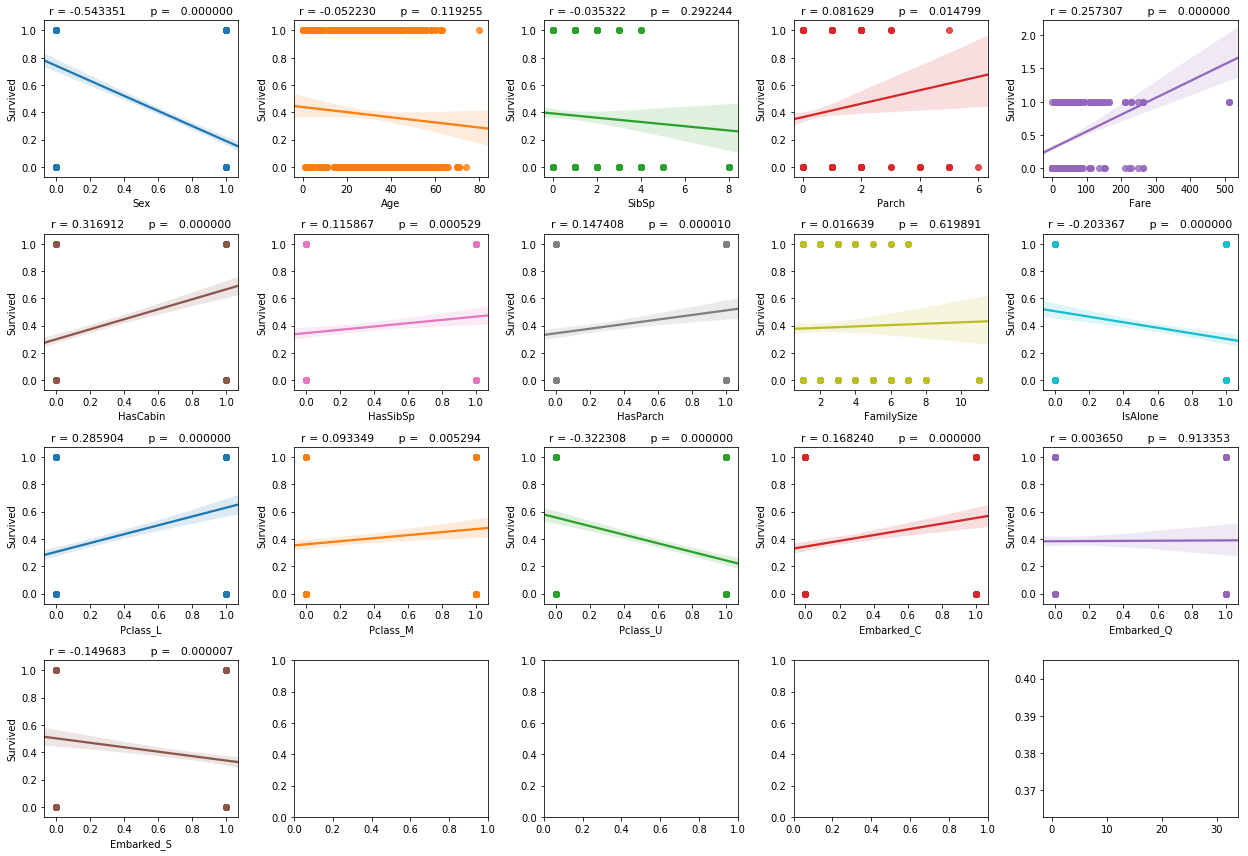

In [51]:
nr_rows = 4
nr_cols = 5
num_feats = train_df_dum.columns
fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(num_feats)
li_not_plot = ['Survived']
li_plot_num_feats = [c for c in list(num_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i=r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(train_df_dum[li_plot_num_feats[i]], train_df_dum['Survived'], ax=axs[r][c])
            stp = stats.pearsonr(train_df_dum[li_plot_num_feats[i]],  train_df_dum['Survived'])
            str_title = "r = " + "{0:2f}".format(stp[0]) + "       " "p =   " + "{0:2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()
plt.show()

C:\Users\errit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\errit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\errit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\errit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\errit\Anaconda

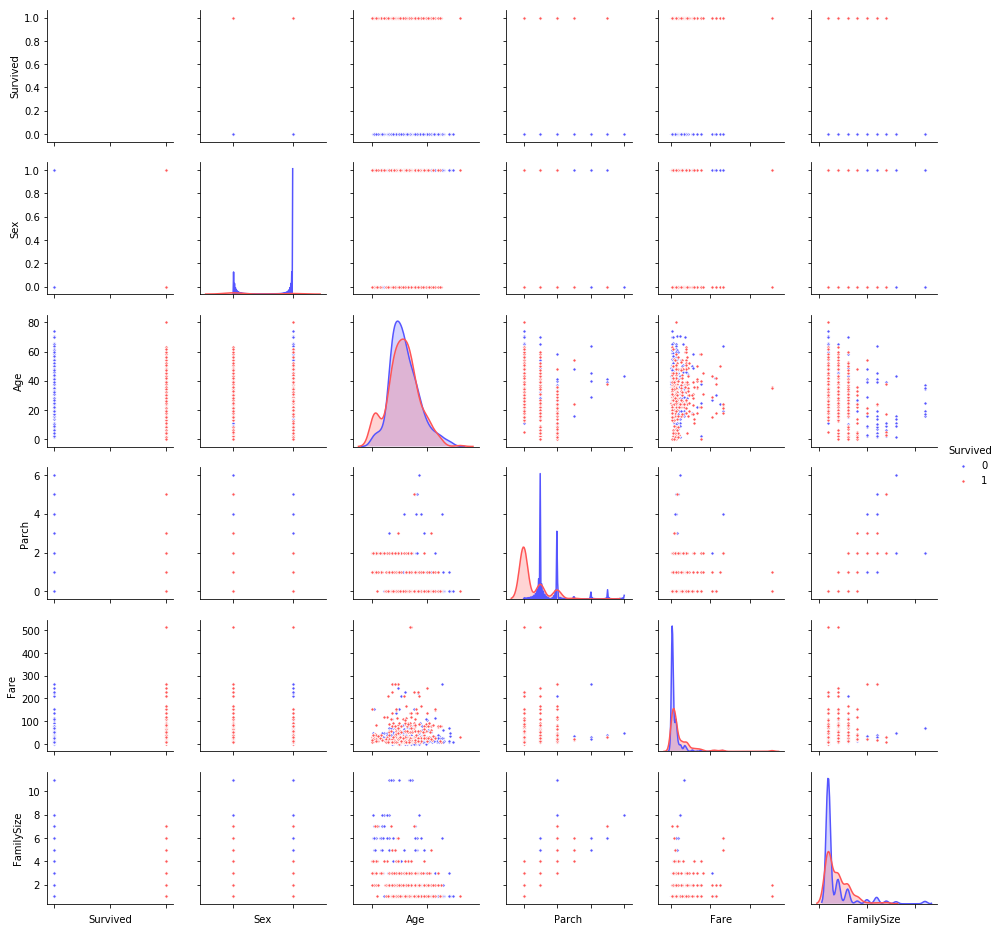

In [52]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'FamilySize']], hue='Survived', palette = 'seismic',size=2.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

C:\Users\errit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


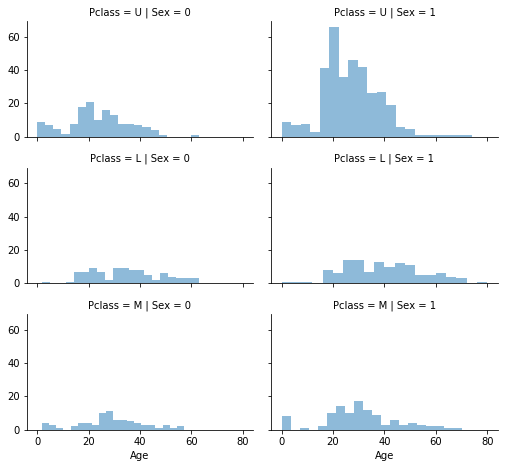

In [53]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [54]:
train_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [55]:
test_df_dum.head()


,Survived,Sex,Age,SibSp,Parch,Fare,HasCabin,HasSibSp,HasParch,FamilySize,IsAlone,Pclass_L,Pclass_M,Pclass_U,Embarked_C,Embarked_Q,Embarked_S
0,0,1,34,0,0,7.829,0,0,0,1,1,0,0,1,0,1,0
1,1,0,47,1,0,7.000,0,1,0,2,0,0,0,1,0,0,1
2,0,1,62,0,0,9.688,0,0,0,1,1,0,1,0,0,1,0
3,0,1,27,0,0,8.662,0,0,0,1,1,0,0,1,0,0,1
4,1,0,22,1,1,12.287,0,1,1,3,0,0,0,1,0,0,1


In [56]:

#writer = pd.ExcelWriter('Titanic_df.xlsx')
#train_df.to_excel(writer,'Sheet1')
#train_df_dum.to_excel(writer,'Sheet2')
#writer.save()


### LOGISTIC REGRESSION

#### Logistic Regression and Logistic Regression CV through direct and ROC/Thresholding approach

In [57]:
# Modelling with Logistic regression
classifier = LogisticRegression()


In [58]:
X_train=train_df_dum.drop(train_df_dum[['Survived']],axis=1)

In [59]:
y_train=train_df_dum[['Survived']]

In [60]:
X_test=test_df_dum.drop(test_df_dum[['Survived']],axis=1)
y_test=test_df_dum['Survived']


In [61]:
LRM = classifier.fit(X_train,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
LRM.coef_

array([[-2.51613055e+00, -2.90378366e-02, -6.73583564e-01,
        -4.18100350e-01,  2.32570757e-03,  8.65866538e-01,
         7.73758086e-01,  6.99287810e-01,  5.19741879e-02,
         6.13339058e-02,  8.56268950e-01,  6.38418357e-01,
        -3.51029205e-01,  5.06528989e-01,  5.25489944e-01,
         1.11639169e-01]])

In [63]:
y_pred_train=LRM.predict(X_train)

In [64]:
y_pred_train.shape

(891,)

In [65]:
y_train.shape

(891, 1)

In [66]:
cf_train = confusion_matrix(y_train,y_pred_train)

In [67]:
cf_train

array([[481,  68],
       [ 97, 245]], dtype=int64)

In [68]:
titanic_lr_accuracy = accuracy_score(y_train,y_pred_train)


In [69]:
print("Train Accuracy Score LR: ",titanic_lr_accuracy)
print("*****************************")
pred_test = LRM.predict(X_test)
print("Test Confusion Matrix LR:\n",confusion_matrix(y_test,pred_test))
print("*****************************")
print("Test Accuracy Score LR: ",accuracy_score(y_test,pred_test))

Train Accuracy Score LR:  0.8148148148148148
*****************************
Test Confusion Matrix LR:
 [[246  20]
 [ 12 140]]
*****************************
Test Accuracy Score LR:  0.9234449760765551


#### Applying Cross Validation with Logistic Regression

In [70]:
classifier = LogisticRegressionCV()

In [71]:
LRM = classifier.fit(X_train,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
y_pred_train=LRM.predict(X_train)
cf_train = confusion_matrix(y_train,y_pred_train)


In [73]:
titanic_lr_accuracy = accuracy_score(y_train,y_pred_train)
print("Train Accuracy Score CV: ",titanic_lr_accuracy)
print("*****************************")
y_pred_test = LRM.predict(X_test)
print("Confusion Matrix CV : \n",confusion_matrix(y_test,pred_test))
print("*****************************")
print("Test Accuracy Score CV: ",accuracy_score(y_test,y_pred_test))

Train Accuracy Score CV:  0.8114478114478114
*****************************
Confusion Matrix CV : 
 [[246  20]
 [ 12 140]]
*****************************
Test Accuracy Score CV:  0.9210526315789473


#### Solving by Deciding Threshold after calculating individual Probabilities

In [74]:
y_pred_train_prob=LRM.predict_proba(X_train)
y_pred_train_prob = y_pred_train_prob[:,1]

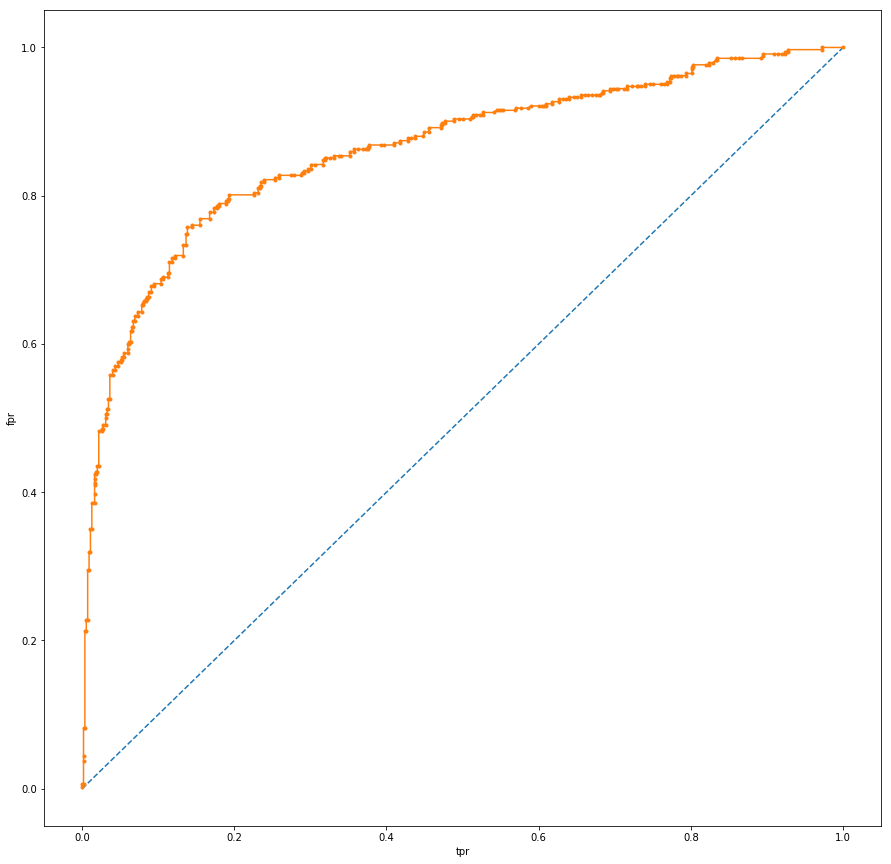

In [75]:

fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_prob)

plt.figure(figsize=(15,15))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.ylabel('fpr')
plt.xlabel('tpr')
# show the plot
plt.show()

In [76]:
y_pred = np.where(y_pred_train_prob>0.575,1,0)

In [77]:
X_test.shape

(418, 16)

In [78]:
accuracy_score(y_train,y_pred)

0.8181818181818182

In [79]:
roc_auc_score(y_train, y_pred_train_prob)

0.8621629970493934

In [80]:
pred_test = LRM.predict(X_test)

In [81]:
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
confusion_matrix(y_test,pred_test)

array([[245,  21],
       [ 12, 140]], dtype=int64)

In [83]:
accuracy_score(y_test,pred_test)

0.9210526315789473

In [84]:
accuracy_score(y_test,pred_test)
acccuracy = pd.DataFrame(columns = ['Train_accuracy','Test_Accuracy'],data=[[0.8159371492704826,0.9258373205741627]])

acccuracy

,Train_accuracy,Test_Accuracy
0,0.816,0.926


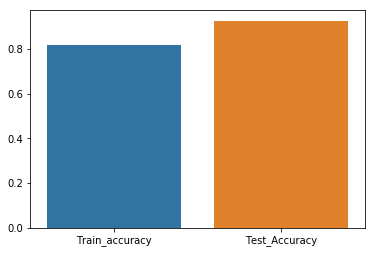

In [85]:
sns.barplot(data=acccuracy)

### DECISION TREES

In [86]:
DTClassifier = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)

In [87]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(891, 16)
(891, 1)
(418, 16)
(418,)


In [88]:
DT_Model = DTClassifier.fit(X_train,y_train)

In [91]:
import graphviz

dot_data = tree.export_graphviz(DT_Model, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=X_train.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data,format='pdf',filename='tree.pdf')  
graph 


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
y_train_pred = DT_Model.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [ ]:
accuracy_score(y_train,y_train_pred)

In [ ]:
# Prdict Decision Tree after Pruning

In [ ]:
t_test_pred = DT_Model.predict(X_test)

In [ ]:
confusion_matrix(y_test,t_test_pred)

In [ ]:
accuracy_score(y_test,t_test_pred)

### ENSEMBLES

#### Using Bagging for Randomization to improve the accuracy and reduce the overfitting probabilities

In [ ]:
# Bagging 

bgclassifier = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, 
                                 bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, 
                                 verbose=0)

seed = 100
num_trees = 200
model = BaggingClassifier(base_estimator=None, n_estimators=num_trees, random_state=seed,bootstrap=True)
model.fit(X_train,y_train)

In [ ]:
results = cross_val_score(model, X_train, y_train)
print(results.mean())
print(results)

In [ ]:
t_train_pred = model.predict(X_train)

In [ ]:
acc = accuracy_score(y_train,t_train_pred)

In [ ]:
t_test_pred = model.predict(X_test)

In [ ]:
print("Train Accuracy Score Bagging CV: ",accuracy_score(y_train,t_train_pred))
print("*****************************")
print("Test Confusion Matrix Bagging CV : \n",confusion_matrix(y_test,t_test_pred))
print("*****************************")
print("Test Accuracy Score Bagging CV: ",accuracy_score(y_test,t_test_pred))

#### Using Boosting for imporving the accuracy score further

In [ ]:
adbclassifier = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adbclassifier, X_train,y_train, cv=5)
scores.mean()   

In [ ]:
Model_ADB = adbclassifier.fit(X_train,y_train)

In [ ]:
t_train_pred = Model_ADB.predict(X_train)

In [ ]:
t_test_pred = Model_ADB.predict(X_test)

In [ ]:
print("Train Accuracy Score Bagging CV: ",accuracy_score(y_train,t_train_pred))
print("*****************************")
print("Test Confusion Matrix Bagging CV : \n",confusion_matrix(y_test,t_test_pred))
print("*****************************")
print("Test Accuracy Score Bagging CV: ",accuracy_score(y_test,t_test_pred))

In [ ]:
gtbclassifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=2, random_state=0)
scores = cross_val_score(gtbclassifier, X_train,y_train, cv=10)
scores.mean()   

In [ ]:
Model_GTB = gtbclassifier.fit(X_train,y_train)

In [ ]:
t_train_pred = Model_GTB.predict(X_train)

In [ ]:
t_test_pred = Model_GTB.predict(X_test)

In [ ]:
print("Train Accuracy Score Bagging CV: ",accuracy_score(y_train,t_train_pred))
print("*****************************")
print("Test Confusion Matrix Bagging CV : \n",confusion_matrix(y_test,t_test_pred))
print("*****************************")
print("Test Accuracy Score Bagging CV: ",accuracy_score(y_test,t_test_pred))

In [ ]:

plt.figure(figsize=(5,5))
plt.barh(X_train.columns, Model_GTB.feature_importances_)

plt.ylabel("Importance Scale")
plt.xlabel("Features")
plt.show()


#### Using Random Forest to understand the improvement in accuracy and feature importance

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=1, random_state=0,oob_score=True)
scores = cross_val_score(RF_classifier, X_train,y_train, cv=5)
scores.mean()

In [ ]:
RF_classifier.fit(X_train,y_train)

In [ ]:
t_train_pred = RF_classifier.predict(X_train)

In [ ]:
t_test_pred = RF_classifier.predict(X_test)

In [ ]:
print("Train Accuracy Score RF CV: ",accuracy_score(y_train,t_train_pred))
print("*****************************")
print("Test Confusion Matrix Bagging CV : \n",confusion_matrix(y_test,t_test_pred))
print("*****************************")
print("Test Accuracy Score Bagging CV: ",accuracy_score(y_test,t_test_pred))

In [ ]:
df = pd.DataFrame(RF_classifier.feature_importances_,X_train.columns)
df.columns = ['Significance']
df = df.sort_values(by='Significance',ascending=True).plot.barh()
plt.ylabel("Features")
plt.xlabel("Feature Importance")
plt.show()

### SUPPORT VECTOR MACHINES

### NAIVE BAYES CLASSIFIER

### LINEAR DISCRIMINANT ANALYSIS

### K-NEAREST NEIGHBOUR

### PRINCIPAL COMPONENT ANALYSIS AND MODELLING THEREAFTER

### STACKED MODELS

### SUBMISSION

### THINGS TO BE CONSIDERED 
###### 1. Age imputations based on Qualitative Analysis
###### 2. Age imputations based on linear regression
###### 3. Measuring Skewness and Kustosis
###### 4. Considering feature scaling
###### 5. Using different sampling methods
###### 6. Creating one strong feature with two or more weak features